### ЗАДАНИЕ 1

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('bmh')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [64]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
Y = pd.DataFrame(boston['target'], columns=["price"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


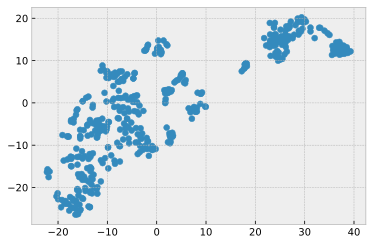

In [68]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### ЗАДАНИЕ 2

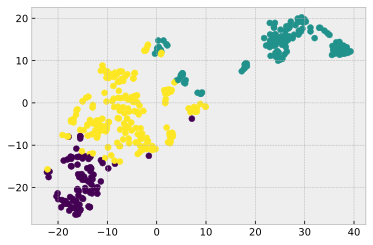

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [72]:
print('Средняя цена по кластерам:')
print(f'Кластер 0: {Y_train.loc[labels_train == 0, "price"].mean():.2f}')
print(f'Кластер 1: {Y_train.loc[labels_train == 1, "price"].mean():.2f}')
print(f'Кластер 2: {Y_train.loc[labels_train == 2, "price"].mean():.2f}')

Средняя цена по кластерам:
Кластер 0: 27.79
Кластер 1: 16.17
Кластер 2: 24.96


In [73]:
print('Средний показатель "CRIM" по кластерам:')
print(f'Кластер 0: {X_train.loc[labels_train == 0, "CRIM"].mean():.3f}')
print(f'Кластер 1: {X_train.loc[labels_train == 1, "CRIM"].mean():.3f}')
print(f'Кластер 2: {X_train.loc[labels_train == 2, "CRIM"].mean():.3f}')

Средний показатель "CRIM" по кластерам:
Кластер 0: 0.074
Кластер 1: 10.797
Кластер 2: 0.422


### ЗАДАНИЕ 3*

In [74]:
#посчитаем "базовый" r2 для модели RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train_scaled, Y_train.values[:, 0])
Y_forest_pred = model.predict(X_test_scaled)

r2_forest = r2_score(Y_forest_pred, Y_test)
r2_forest

0.8559619839107886

In [82]:
labels_test = kmeans.predict(X_test_scaled)

In [80]:
#r2 по кластерам - кластер 0
model.fit(X_train_scaled.loc[labels_train == 0], Y_train.loc[labels_train == 0].values[:, 0])

Y_test_pred_0 = model.predict(X_test_scaled.loc[labels_test == 0])

r2_score(Y_test[labels_test == 0].values[:, 0], Y_test_pred_0)

0.9166413978395764

In [83]:
#r2 по кластерам - кластер 1
model.fit(X_train_scaled.loc[labels_train == 1], Y_train.loc[labels_train == 1].values[:, 0])

Y_test_pred_1 = model.predict(X_test_scaled.loc[labels_test == 1])

r2_score(Y_test[labels_test == 1].values[:, 0], Y_test_pred_1)

0.6649347197606783

In [84]:
#r2 по кластерам - кластер 2
model.fit(X_train_scaled.loc[labels_train == 2], Y_train.loc[labels_train == 2].values[:, 0])

Y_test_pred_2 = model.predict(X_test_scaled.loc[labels_test == 2])

r2_score(Y_test[labels_test == 2].values[:, 0], Y_test_pred_2)

0.8746300431137938

In [86]:
#итоговый r2 модели RFR из 3 кластеров
Y_test_resulted = np.hstack([Y_test.loc[labels_test == 0].values[:, 0], Y_test.loc[labels_test == 1].values[:, 0], Y_test.loc[labels_test == 2].values[:, 0]])
Y_test_pred_resulted = np.hstack([Y_test_pred_0, Y_test_pred_1, Y_test_pred_2])

r2_score(Y_test_resulted, Y_test_pred_resulted)

0.8636775657504616

ВЫВОД: Получилось не намного лучше, чем без разбиения на кластеры (было vs стало) как (0.856 vs 0.864).
Сравним для линейной регрессии.

In [88]:
#посчитаем "базовый" r2 для модели линейной регрессии

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_scaled, Y_train)

Y_test_pred = lr.predict(X_test_scaled)

r2_score(Y_test, Y_test_pred)

0.668759493535632

In [91]:
#r2 по кластерам - кластер 0
lr.fit(X_train_scaled.loc[labels_train == 0], Y_train.loc[labels_train == 0].values[:, 0])

Y_lr_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(Y_test[labels_test == 0].values[:, 0], Y_lr_pred_0)

0.9155161972050826

In [92]:
#r2 по кластерам - кластер 1
lr.fit(X_train_scaled.loc[labels_train == 1], Y_train.loc[labels_train == 1].values[:, 0])

Y_lr_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(Y_test[labels_test == 1].values[:, 0], Y_lr_pred_1)

0.5233031559133994

In [93]:
#r2 по кластерам - кластер 2
lr.fit(X_train_scaled.loc[labels_train == 2], Y_train.loc[labels_train == 2].values[:, 0])

Y_lr_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])

r2_score(Y_test[labels_test == 2].values[:, 0], Y_lr_pred_2)

0.7215240423132012

In [94]:
#итоговый r2 модели LR из 3 кластеров

Y_lr_pred_resulted = np.hstack([Y_lr_pred_0, Y_lr_pred_1, Y_lr_pred_2])

r2_score(Y_test_resulted, Y_lr_pred_resulted)

0.7955578636398192

ВЫВОД: Кластеризация улучшила результат (было vs стало) как (0.669 vs 0.796).